In [1]:
from os.path import dirname, abspath
from os.path import join
import PIL
from PIL.Image import open, new, fromarray
from PIL.ImageOps import expand
from matplotlib.pyplot import savefig, imshow, set_cmap
import matplotlib.pyplot as plt
import numpy as np

from numpy import linalg as LA

# Load CBCL Faces Dataset

In [2]:
import scipy.io

mat = scipy.io.loadmat('./X.mat')
print(mat['X'].shape)
dataset = mat['X']
print(dataset.shape)


(2429, 361)
(2429, 361)


## Visualize some faces

In [3]:
def visualize(faces, pic_num=16):
    n = int(np.sqrt(pic_num))
    fig, axs = plt.subplots(n, n, figsize=(19, 19))
    for i in range(n*n):
        ax = axs[i//n, i%n]
        ax.imshow(faces[i,:].reshape(19, 19).T, cmap='gray')
        ax.axis('off')

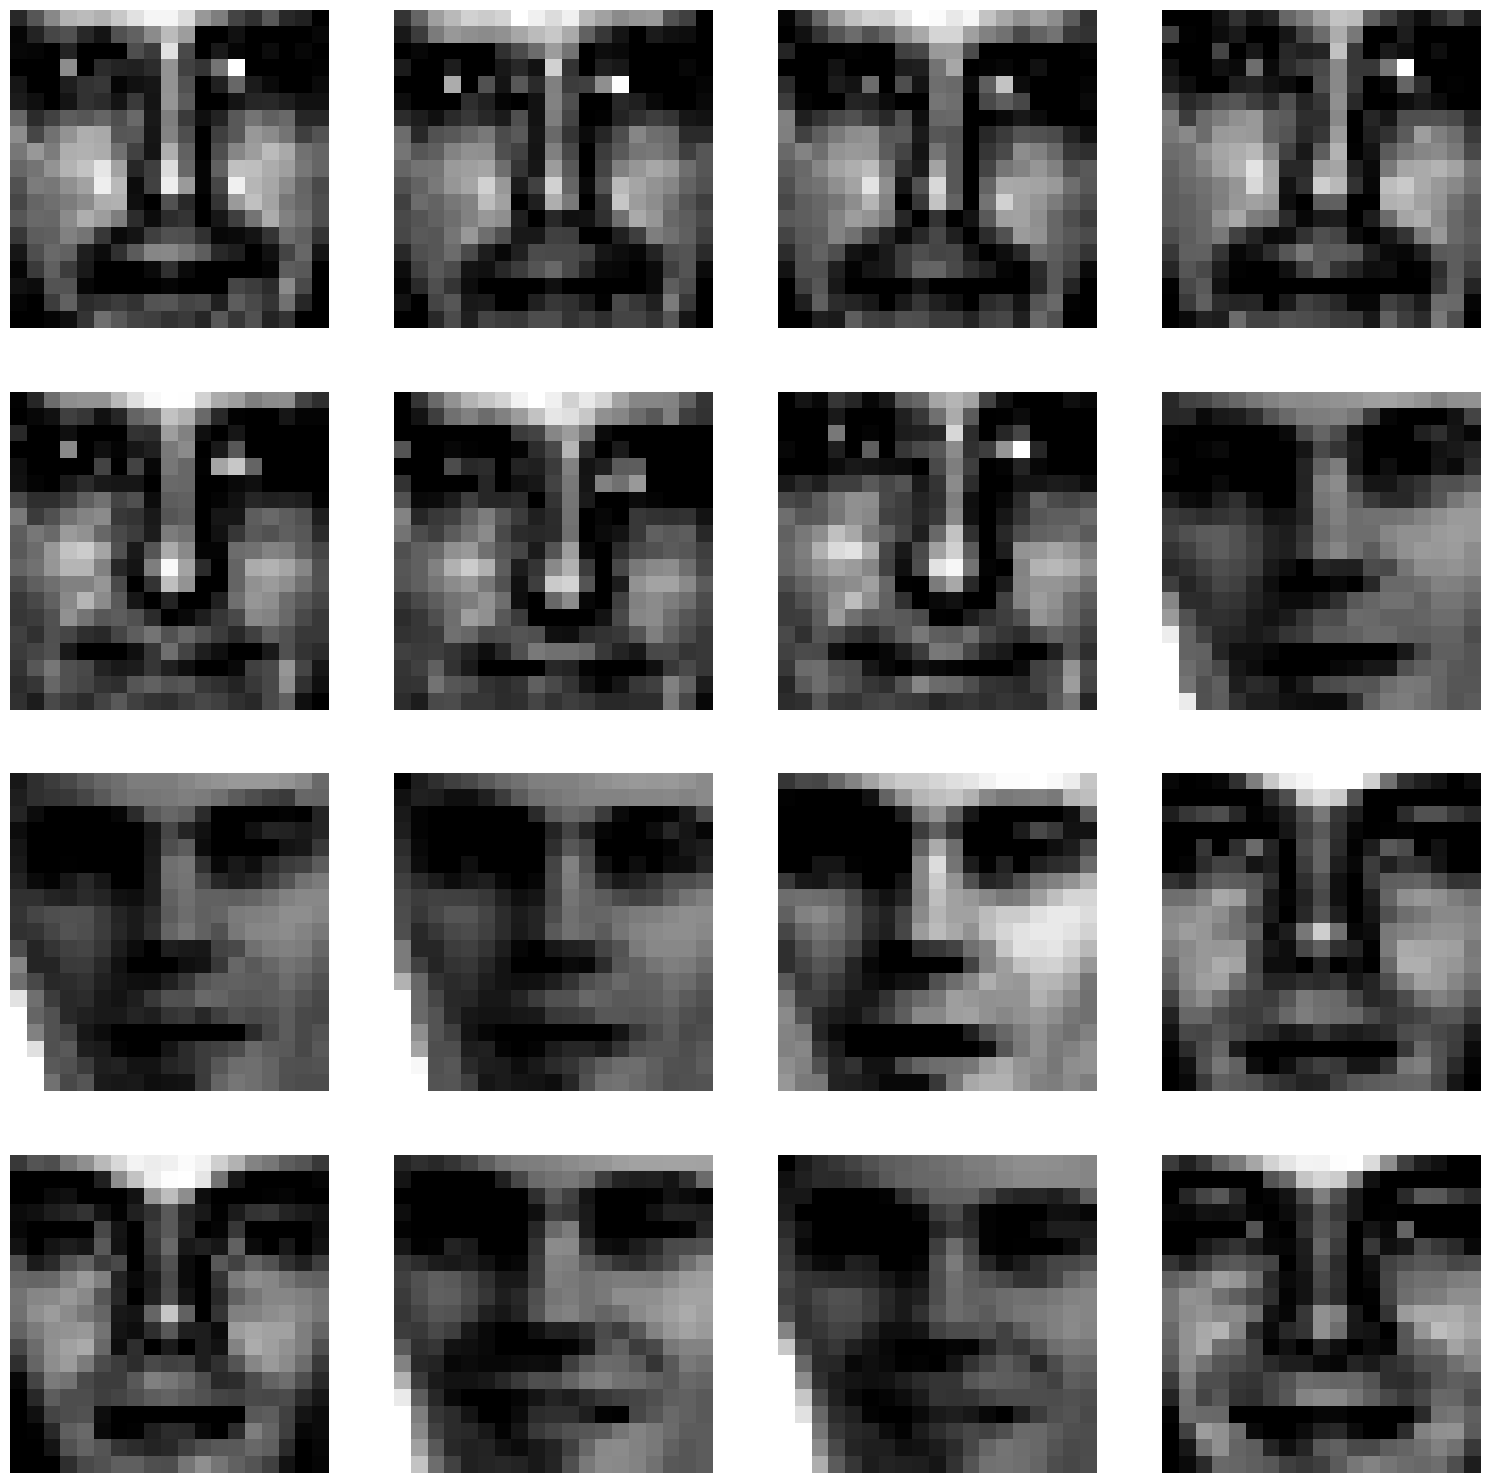

In [4]:
visualize(dataset)

In [7]:
def NMF(A, iterations=3000, alpha=0.0001, r=100):
    '''
    Parameter
    ---------
    A: Dateset, original matrix
    iterations: Amount of iterations
    alpha: Learning Rate
    r = rank of factorisation

    Returns
    --------

    W: the basis matrix
    H:  the coefficient matrix
    '''

    W = np.random.uniform(size=(A.shape[0], r), low=0.0, high=1.0)
    H = np.random.uniform(size=(r, A.shape[1]), low=0.0, high=1.0)

    for i in range(iterations):
        error = LA.norm(A - W @ H)
        print(f"iteration {i}, error: {error}")
        gradient_W = -2 * (A - W @ H) @ H.T
        gradient_H = -2 * W.T @ (A - W @ H)

        W = np.maximum(W - alpha * gradient_W, 0)
        H = np.maximum(H - alpha * gradient_H, 0)

    return W, H

In [8]:
W,H = NMF(dataset)

iteration 0, error: 23324.457132169984
iteration 1, error: 323.5997994966276
iteration 2, error: 323.17590190493206
iteration 3, error: 322.75104211845235
iteration 4, error: 322.31989654586306
iteration 5, error: 321.877169405001
iteration 6, error: 321.41752942657496
iteration 7, error: 320.93554987377325
iteration 8, error: 320.42565133079665
iteration 9, error: 319.88204690605636
iteration 10, error: 319.2986896898494
iteration 11, error: 318.6692225095813
iteration 12, error: 317.9869302453122
iteration 13, error: 317.24469521135484
iteration 14, error: 316.4349563821245
iteration 15, error: 315.5496735479072
iteration 16, error: 314.58029783298826
iteration 17, error: 313.51775039716256
iteration 18, error: 312.35241157183145
iteration 19, error: 311.07412314954666
iteration 20, error: 309.6722070414396
iteration 21, error: 308.13550402357606
iteration 22, error: 306.45243678444376
iteration 23, error: 304.6111019230583
iteration 24, error: 302.599395877614
iteration 25, error: 3

In [12]:
print(f"W.shape = {W.shape}, H.shape = {H.shape}")
print(W)

W.shape = (2429, 100), H.shape = (100, 361)
[[0.00000000e+00 2.18794191e-02 0.00000000e+00 ... 0.00000000e+00
  6.34127028e-02 1.26886967e-01]
 [0.00000000e+00 6.73009717e-02 0.00000000e+00 ... 1.17948109e-02
  9.98412614e-02 0.00000000e+00]
 [0.00000000e+00 1.42509806e-01 0.00000000e+00 ... 1.55113074e-04
  1.09315479e-01 6.20552687e-02]
 ...
 [6.24948847e-03 5.14417228e-02 0.00000000e+00 ... 1.36219926e-01
  9.61194029e-02 0.00000000e+00]
 [2.83338475e-02 9.80403713e-02 0.00000000e+00 ... 1.01122227e-01
  2.13628494e-01 0.00000000e+00]
 [2.97221853e-02 0.00000000e+00 0.00000000e+00 ... 6.99669713e-02
  1.48797061e-01 0.00000000e+00]]


## Face parts

The matrix H consists after optimization of face parts and each face in the dataset is a positive combination of those.

Let us visualize some entries of H.

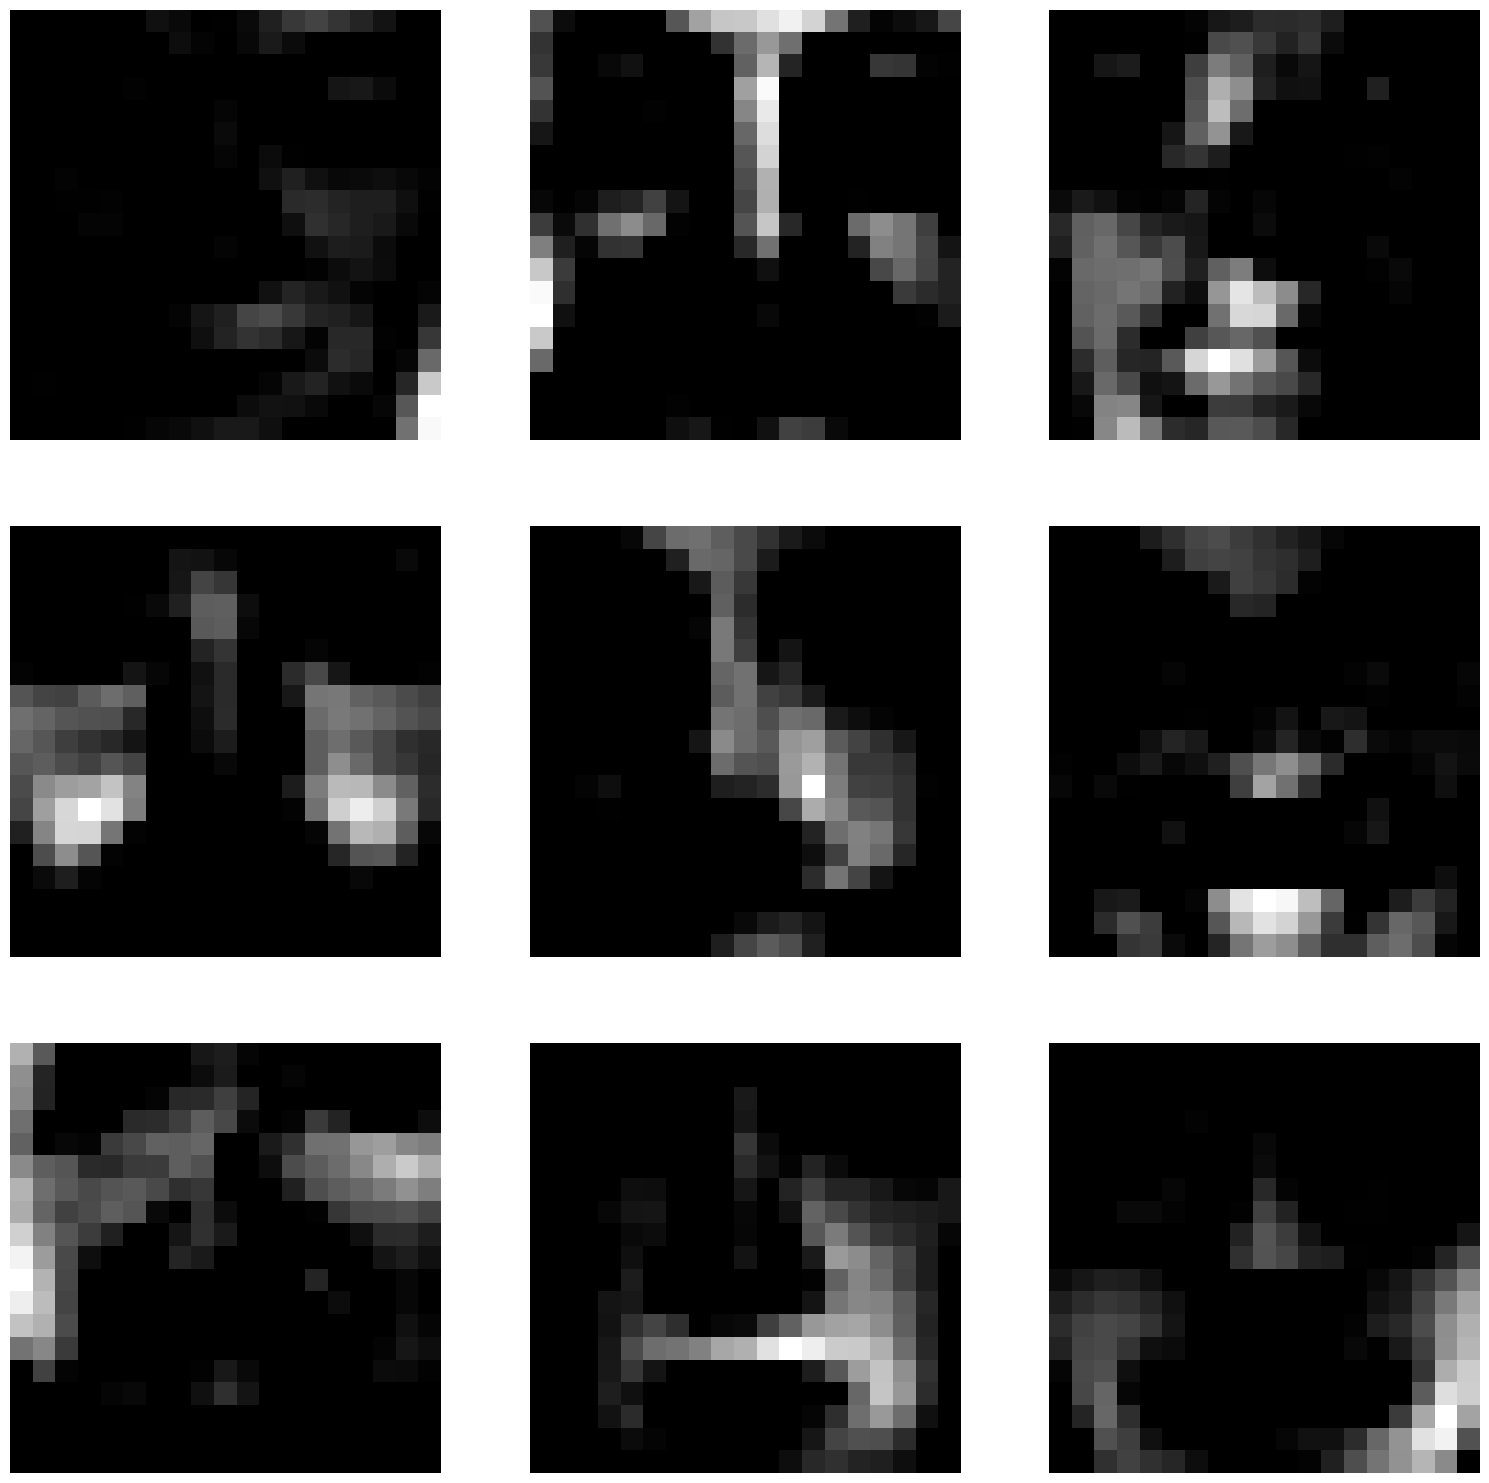

In [13]:
visualize(H, 9)

## Reconstruction

Let us reconstruct the first face in the dataset given the NMF.

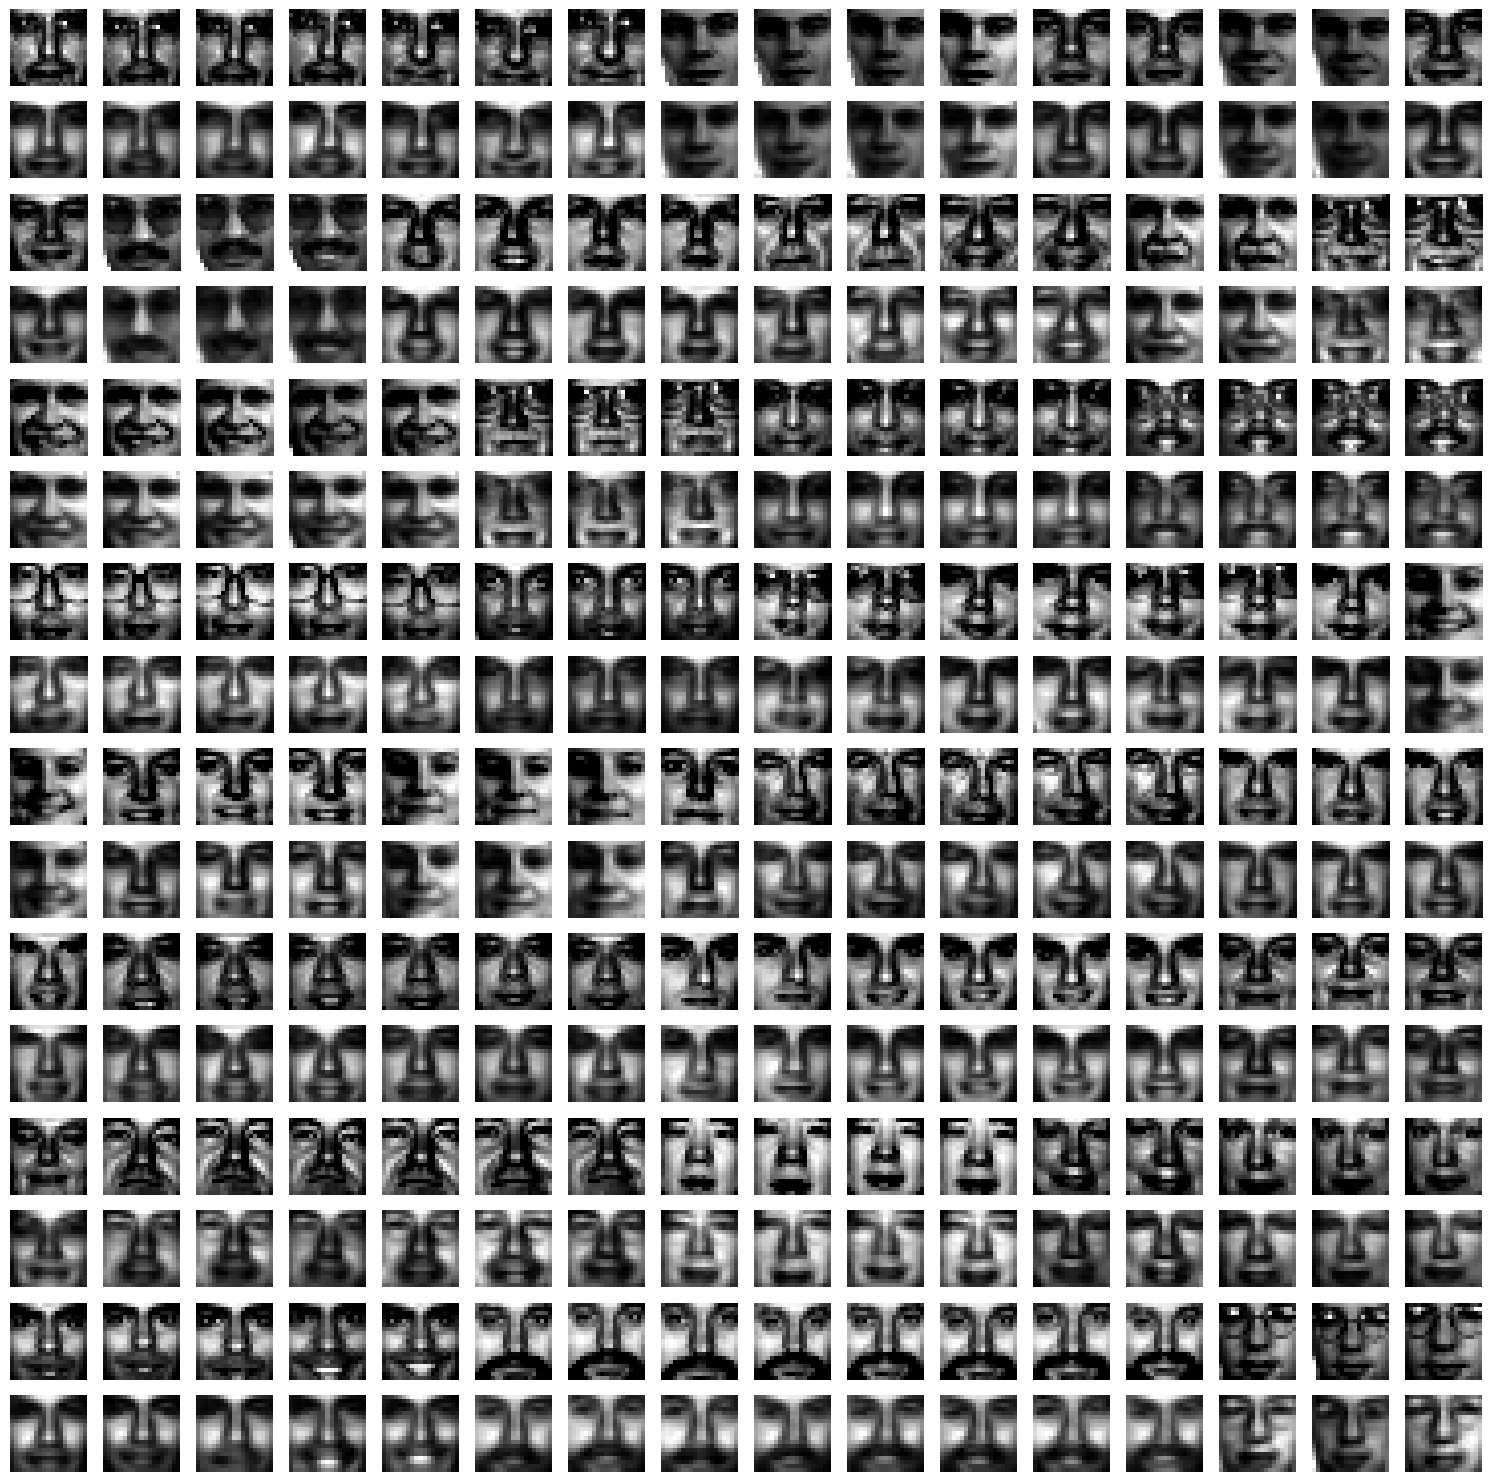

In [14]:
n = 16
fig, axs = plt.subplots(n, n, figsize=(19, 19))
for i in range(n*(n//2)):
    face = dataset[i,:].reshape(19, 19).T
    recon = (W[i,:] @ H).reshape(19, 19).T

    ax = axs[i//n * 2, i%(n)]
    ax.imshow(face, cmap='gray')
    ax.axis('off')
    ax = axs[i//n * 2 + 1, i%(n)]
    ax.imshow(recon, cmap='gray')
    ax.axis('off')